# Car Sales Analysis

![Picture title](image-20220417-180644.png)

En este proyecto realizaremos un analisis exploratorio de datos (EDA) sobre un dataset de una 
concesionaria de autos que desea investigar qué género de cliente genera más ingresos y predecir 
el género del cliente que compra cierto tipo de auto usando la columna Sale Price.

## 1.Cargando datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sales = pd.read_csv("CarsData.csv")
test = pd.read_csv("test.csv",delimiter=";")
sales.head(20) 

,Make,Model,Nickname,Car Gender,Buyer Gender,Buyer Age,Buzzword,Country,City,Dealer Latitude,Dealer Longitude,Color,New Car,Purchase Date,Sale Price,Discount,Resell Price,5-yr Depreciation,Top Speed,0-60 Time
0,Suzuki,Vitara,Philippine,Female,Female,51,User-friendly,Belgium,Antwerpen,51.247239,4.440346,Yellow,False,19/07/2009,54806.14,0.2467,33858.32,0.13,200.9,11.5
1,Honda,S2000,Henrik,Male,Male,30,analyzing,China,Jinhu,33.025433,119.020584,Crimson,False,26/10/2015,51826.30,0.3147,2989.28,0.02,158.5,8.8
2,BMW,Z4,Lebbie,Male,Female,54,software,China,Gemo,30.916207,121.677640,Khaki,False,28/03/2010,82929.14,0.5414,35049.16,0.24,149.5,14.4
3,Toyota,Tacoma,Jefferey,Female,Male,68,monitoring,Portugal,Queluz de Baixo,38.745168,-9.267087,Puce,False,07/05/2008,56928.66,0.0850,8236.15,0.20,153.3,11.5
4,Ford,Festiva,Glendon,Female,Male,70,Sharable,Latvia,Jaunpils,56.729980,23.016588,Yellow,False,01/06/2008,77201.26,0.1642,32765.76,0.18,122.0,14.9
5,Buick,Skylark,Glad,Male,Female,70,Vision-oriented,Mexico,Guadalupe,25.677560,-100.259693,Crimson,False,17/05/2007,50882.23,0.6913,38576.59,0.16,182.7,9.6
6,Infiniti,QX,Bud,Male,Male,66,throughput,Japan,Gosen,37.752524,139.165056,Fuscia,True,11/08/2017,69680.54,0.1657,27962.25,0.18,231.8,5.3
7,Ram,C/V,Geoffrey,Female,Male,37,circuit,Russia,Izborsk,57.708244,27.860883,Aquamarine,True,23/11/2007,56393.91,0.1006,29157.95,0.14,144.1,4.7
8,GMC,Safari,Marius,Female,Male,43,bottom-line,Luxembourg,Eschweiler,49.997540,5.947564,Mauv,True,16/03/2003,13797.81,0.2126,31062.38,0.01,223.3,5.8
9,Nissan,Altima,Vi,Male,Female,73,Grass-roots,Cyprus,Meneou,34.858265,33.600789,Puce,True,19/05/2019,15176.04,0.1922,45892.79,0.12,170.4,4.1


In [ ]:
test.head(20)

,Make,Model,Nickname,Car Gender,Buyer Age,Buzzword,Country,City,Dealer Latitude,Dealer Longitude,Color,New Car,Purchase Date,Sale Price,Discount,Resell Price,5-yr Depreciation,Top Speed,0-60 Time
0,Infiniti,G,Eliot,Male,51,multi-tasking,Hungary,Budapest,47.387906,19.115039,Mauv,VERDADERO,5/11/2015,70924.82,0.6790,13065.96,0.12,187.7,9.8
1,Chevrolet,Suburban 2500,Bryna,Male,59,framework,Indonesia,Liliba,-10.170262,123.642753,Crimson,FALSO,2/04/2015,90407.26,0.1462,40998.62,0.16,197.9,2.5
2,Mitsubishi,Precis,Mack,Female,32,homogeneous,China,Shuangxing,41.773024,123.356112,Fuscia,FALSO,5/06/2016,51744.01,0.1785,17450.08,0.22,152.3,10.9
3,Mercedes-Benz,E-Class,Elora,Female,43,attitude-oriented,France,Grenoble,45.193486,5.721898,Violet,FALSO,29/05/2016,60654.60,0.2899,43694.28,0.06,179.0,5.6
4,Plymouth,Breeze,Sigvard,Male,34,Inverse,Ukraine,Khust,48.173463,23.297248,Indigo,FALSO,10/03/2009,68702.62,0.0721,19594.64,0.14,225.0,10.3
5,Chevrolet,Avalanche,Rutherford,Female,49,definition,China,Changbai,41.420018,128.200789,Puce,FALSO,21/08/2009,71175.68,0.2651,2185.58,0.22,249.8,10.1
6,Dodge,Grand Caravan,Gaylor,Female,22,hardware,Serbia,Ruma,45.007532,19.822717,Orange,FALSO,25/08/2003,85994.34,0.4909,12847.23,0.22,141.5,10.3
7,Toyota,Celica,Emilie,Male,27,Realigned,Portugal,Castedo,41.227063,-7.466669,Teal,FALSO,26/02/2006,75295.60,0.6110,46941.06,0.01,225.3,8.2
8,Spyker,C8 Double 12 S,Datha,Female,69,Managed,Colombia,San Agustín,1.879826,-76.270749,Turquoise,VERDADERO,15/09/2009,83554.58,0.1577,25312.41,0.11,150.1,6.1
9,GMC,Yukon XL 1500,Chickie,Male,70,internet solution,Indonesia,Waitenepang,-8.271789,123.111937,Khaki,VERDADERO,13/06/2018,62588.26,0.5413,37943.73,0.16,133.1,11.1


## 2. Explorando datos

In [ ]:
sales.columns

Index(['Make', 'Model', 'Nickname', 'Car Gender', 'Buyer Gender', 'Buyer Age',
       'Buzzword', 'Country', 'City', 'Dealer Latitude', 'Dealer Longitude',
       'Color', 'New Car', 'Purchase Date', 'Sale Price', 'Discount',
       'Resell Price', '5-yr Depreciation', 'Top Speed', '0-60 Time'],
      dtype='object')

In [ ]:
sales.shape

(4998, 20)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               4998 non-null   object 
 1   Model              4998 non-null   object 
 2   Nickname           4998 non-null   object 
 3   Car Gender         4998 non-null   object 
 4   Buyer Gender       4998 non-null   object 
 5   Buyer Age          4998 non-null   int64  
 6   Buzzword           4998 non-null   object 
 7   Country            4998 non-null   object 
 8   City               4998 non-null   object 
 9   Dealer Latitude    4998 non-null   float64
 10  Dealer Longitude   4998 non-null   float64
 11  Color              4998 non-null   object 
 12  New Car            4998 non-null   bool   
 13  Purchase Date      4998 non-null   object 
 14  Sale Price         4998 non-null   float64
 15  Discount           4998 non-null   float64
 16  Resell Price       4998 

In [ ]:
# Datos sobre las variables númericas
sales.describe()

,Buyer Age,Dealer Latitude,Dealer Longitude,Sale Price,Discount,Resell Price,5-yr Depreciation,Top Speed,0-60 Time
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,47.833133,24.800118,42.477182,54921.710696,0.351965,26150.128890,0.130600,184.319688,8.429572
std,16.035387,24.615608,71.714734,25685.608747,0.200869,13738.040977,0.069373,37.474386,3.735420
min,20.000000,-46.599612,-172.516554,10003.760000,0.000100,2000.840000,0.010000,120.000000,2.000000
25%,34.000000,7.393803,2.596604,33053.700000,0.179400,14242.680000,0.070000,152.125000,5.200000
50%,48.000000,30.910443,37.517447,54896.375000,0.354300,26590.960000,0.130000,184.250000,8.500000
75%,62.000000,44.272958,111.897510,77080.860000,0.523575,38040.627500,0.190000,217.000000,11.700000
max,75.000000,69.631860,179.350460,99991.910000,0.699400,49997.050000,0.250000,250.000000,15.000000


In [ ]:
# Datos sobre las variables categóricas
sales.describe(include = ["O"])

,Make,Model,Nickname,Car Gender,Buyer Gender,Buzzword,Country,City,Color,Purchase Date
count,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998
unique,69,876,3728,2,2,305,178,4434,19,3543
top,Ford,Corvette,Laurie,Male,Female,solution,China,Stockholm,Mauv,07/10/2016
freq,428,31,5,2520,2518,30,949,17,299,6


## 3. EDA: Estudio de variable target

## Target vs New Car

In [ ]:
sales.groupby(["Buyer Gender"]).count()['Model']

Buyer Gender
Female    2518
Male      2480
Name: Model, dtype: int64

In [ ]:
sales.groupby(["Buyer Gender","New Car"]).count()['Model']

Buyer Gender  New Car
Female        False      1252
              True       1266
Male          False      1267
              True       1213
Name: Model, dtype: int64

Buyer Gender  New Car
Female        False      1252
              True       1266
Male          False      1267
              True       1213
Name: Model, dtype: int64


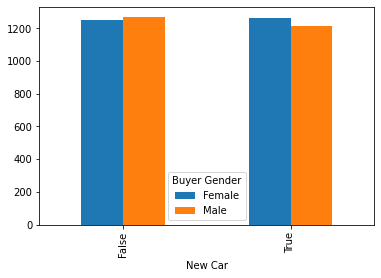

In [ ]:
grouped_sex = sales.groupby(['Buyer Gender', 'New Car']).count()['Model']
print(grouped_sex)
(grouped_sex.unstack(level=0).plot.bar())
plt.show()

In [ ]:
grouped_sex.unstack(level=1)

New Car,False,True
Buyer Gender,,
Female,1252,1266
Male,1267,1213


Buyer Age vs New Car

AxesSubplot(0.125,0.125;0.775x0.755)


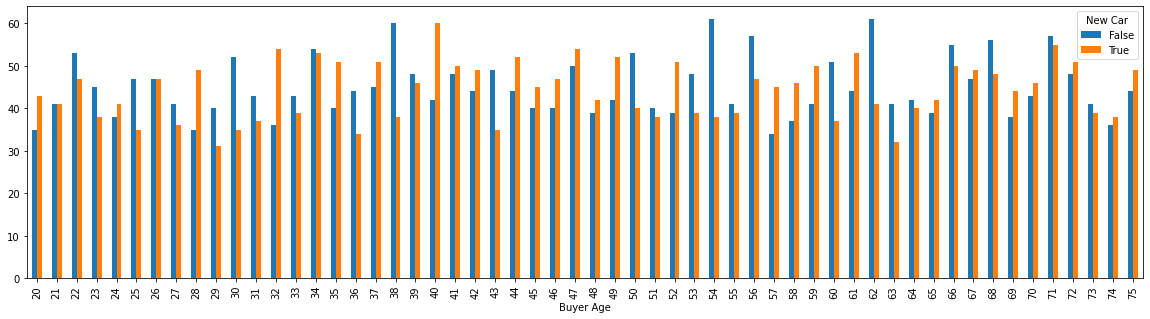

In [ ]:
print(sales.groupby(['Buyer Age', 'New Car'])
.count()["Model"]
.unstack(level=1)
.plot.bar(figsize=(20,5)))

## 4. Procesamiento de datos

Aqui seleccionamos las variables con las que trabajaremos

In [ ]:
sales[[
    "Make",
    "Model",
    "Buyer Gender",
    "Buyer Age",
    "New Car",
    "Sale Price",
    "5-yr Depreciation",
    "Top Speed",
    "0-60 Time"
]]

,Make,Model,Buyer Gender,Buyer Age,New Car,Sale Price,5-yr Depreciation,Top Speed,0-60 Time
0,Suzuki,Vitara,Female,51,False,54806.14,0.13,200.9,11.5
1,Honda,S2000,Male,30,False,51826.30,0.02,158.5,8.8
2,BMW,Z4,Female,54,False,82929.14,0.24,149.5,14.4
3,Toyota,Tacoma,Male,68,False,56928.66,0.20,153.3,11.5
4,Ford,Festiva,Male,70,False,77201.26,0.18,122.0,14.9
...,...,...,...,...,...,...,...,...,...
4993,Dodge,Grand Caravan,Male,51,True,67254.72,0.11,191.7,8.3
4994,Dodge,Shadow,Female,38,False,68142.45,0.24,243.1,5.7
4995,Jeep,Wrangler,Female,23,True,57902.43,0.12,224.8,3.9
4996,Subaru,Outback,Male,62,False,57009.68,0.24,201.6,12.4


In [ ]:
sales[[
    "Make",
    "Model",
    "Buyer Gender",
    "Buyer Age",
    "New Car",
    "Sale Price",
    "5-yr Depreciation",
    "Top Speed",
    "0-60 Time"
]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               4998 non-null   object 
 1   Model              4998 non-null   object 
 2   Buyer Gender       4998 non-null   object 
 3   Buyer Age          4998 non-null   int64  
 4   New Car            4998 non-null   bool   
 5   Sale Price         4998 non-null   float64
 6   5-yr Depreciation  4998 non-null   float64
 7   Top Speed          4998 non-null   float64
 8   0-60 Time          4998 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 317.4+ KB


Se observa que no tenemos variables nulas, entonces no tendremos que reemplazar ningun valor.

In [ ]:
#metodo map del label encoding
sales['Buyer Gender'] = sales["Buyer Gender"].map({"Female": 1, "Male": 0}).astype(int)
sales['New Car'] = sales["New Car"].map({True: 1, False: 0}).astype(int)

In [ ]:
sales[['Model', 'Buyer Gender', "New Car"]].head()

,Model,Buyer Gender,New Car
0,Vitara,1,0
1,S2000,0,0
2,Z4,1,0
3,Tacoma,0,0
4,Festiva,0,0


#### Estudio Precio de auto vs genero

In [ ]:
#sales.groupby(['Buyer Gender'])
sales.groupby(['Buyer Gender']).sum()["Sale Price"]

Buyer Gender
0    1.359110e+08
1    1.385877e+08
Name: Sale Price, dtype: float64

Se obtiene que los ingresos por genero son:

Mujeres $210.040.800.000.000

Hombres $203.521.700.000.000

#### Crear variables

In [ ]:

# Variables dependientes
Y_train = sales["Buyer Gender"]

# Preprocesamiento de variables independientes
X_train = sales[[
    "Buyer Age",
    "Top Speed",
    "5-yr Depreciation",
    "Sale Price"
]]

print(Y_train, X_train)

0       1
1       0
2       1
3       0
4       0
       ..
4993    0
4994    1
4995    1
4996    0
4997    0
Name: Buyer Gender, Length: 4998, dtype: int64       Buyer Age  Top Speed  5-yr Depreciation  Sale Price
0            51      200.9               0.13    54806.14
1            30      158.5               0.02    51826.30
2            54      149.5               0.24    82929.14
3            68      153.3               0.20    56928.66
4            70      122.0               0.18    77201.26
...         ...        ...                ...         ...
4993         51      191.7               0.11    67254.72
4994         38      243.1               0.24    68142.45
4995         23      224.8               0.12    57902.43
4996         62      201.6               0.24    57009.68
4997         49      129.9               0.07    71653.19

[4998 rows x 4 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train.shape

(4998, 4)

## 5. Modelado

In [ ]:
# Entrenar el modelo de árboles de descisión
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train , Y_train)

DecisionTreeClassifier()

## 6. Evaluación

In [ ]:
#import seaborn as sns

#sns.heatmap(X_train, annot=True)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(modelo):
    disp = plot_confusion_matrix(modelo , X_train , Y_train , 
                                cmap = plt.cm.Blues , values_format = "d")
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print("accuracy: " , np.round(accuracy , 2))
    plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
accuracy:  1.0


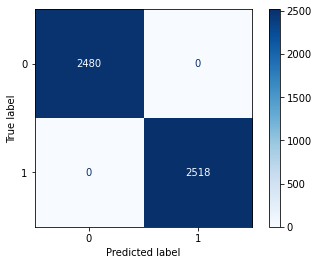

In [ ]:
conf_mat_acc(decision_tree)

In [ ]:
# Preparar el test set para la evaluación

print(test.head())
test.info()

            Make          Model Nickname Car Gender  Buyer Age  \
0       Infiniti              G    Eliot       Male         51   
1      Chevrolet  Suburban 2500    Bryna       Male         59   
2     Mitsubishi         Precis     Mack     Female         32   
3  Mercedes-Benz        E-Class    Elora     Female         43   
4       Plymouth         Breeze  Sigvard       Male         34   

            Buzzword    Country        City  Dealer Latitude  \
0      multi-tasking    Hungary    Budapest        47.387906   
1          framework  Indonesia      Liliba       -10.170262   
2        homogeneous      China  Shuangxing        41.773024   
3  attitude-oriented     France    Grenoble        45.193486   
4            Inverse    Ukraine       Khust        48.173463   

   Dealer Longitude    Color    New Car Purchase Date  Sale Price  Discount  \
0         19.115039     Mauv  VERDADERO     5/11/2015    70924.82    0.6790   
1        123.642753  Crimson      FALSO     2/04/2015    904

In [ ]:
# Preparando test set
# Cambiando estado del carro
test['New Car'] = test["New Car"].map({"VERDADERO": 1, "FALSO": 0}).astype(int)
test.head(20)

,Make,Model,Nickname,Car Gender,Buyer Age,Buzzword,Country,City,Dealer Latitude,Dealer Longitude,Color,New Car,Purchase Date,Sale Price,Discount,Resell Price,5-yr Depreciation,Top Speed,0-60 Time
0,Infiniti,G,Eliot,Male,51,multi-tasking,Hungary,Budapest,47.387906,19.115039,Mauv,1,5/11/2015,70924.82,0.6790,13065.96,0.12,187.7,9.8
1,Chevrolet,Suburban 2500,Bryna,Male,59,framework,Indonesia,Liliba,-10.170262,123.642753,Crimson,0,2/04/2015,90407.26,0.1462,40998.62,0.16,197.9,2.5
2,Mitsubishi,Precis,Mack,Female,32,homogeneous,China,Shuangxing,41.773024,123.356112,Fuscia,0,5/06/2016,51744.01,0.1785,17450.08,0.22,152.3,10.9
3,Mercedes-Benz,E-Class,Elora,Female,43,attitude-oriented,France,Grenoble,45.193486,5.721898,Violet,0,29/05/2016,60654.60,0.2899,43694.28,0.06,179.0,5.6
4,Plymouth,Breeze,Sigvard,Male,34,Inverse,Ukraine,Khust,48.173463,23.297248,Indigo,0,10/03/2009,68702.62,0.0721,19594.64,0.14,225.0,10.3
5,Chevrolet,Avalanche,Rutherford,Female,49,definition,China,Changbai,41.420018,128.200789,Puce,0,21/08/2009,71175.68,0.2651,2185.58,0.22,249.8,10.1
6,Dodge,Grand Caravan,Gaylor,Female,22,hardware,Serbia,Ruma,45.007532,19.822717,Orange,0,25/08/2003,85994.34,0.4909,12847.23,0.22,141.5,10.3
7,Toyota,Celica,Emilie,Male,27,Realigned,Portugal,Castedo,41.227063,-7.466669,Teal,0,26/02/2006,75295.60,0.6110,46941.06,0.01,225.3,8.2
8,Spyker,C8 Double 12 S,Datha,Female,69,Managed,Colombia,San Agustín,1.879826,-76.270749,Turquoise,1,15/09/2009,83554.58,0.1577,25312.41,0.11,150.1,6.1
9,GMC,Yukon XL 1500,Chickie,Male,70,internet solution,Indonesia,Waitenepang,-8.271789,123.111937,Khaki,1,13/06/2018,62588.26,0.5413,37943.73,0.16,133.1,11.1


In [ ]:
print(test.info())
test[[
    "Buyer Age",
    "Top Speed",
    "5-yr Depreciation",
    "Sale Price"
]].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               5002 non-null   object 
 1   Model              5002 non-null   object 
 2   Nickname           5002 non-null   object 
 3   Car Gender         5002 non-null   object 
 4   Buyer Age          5002 non-null   int64  
 5   Buzzword           5002 non-null   object 
 6   Country            5002 non-null   object 
 7   City               5002 non-null   object 
 8   Dealer Latitude    5002 non-null   float64
 9   Dealer Longitude   5002 non-null   float64
 10  Color              5002 non-null   object 
 11  New Car            5002 non-null   int64  
 12  Purchase Date      5002 non-null   object 
 13  Sale Price         5002 non-null   float64
 14  Discount           5002 non-null   float64
 15  Resell Price       5002 non-null   float64
 16  5-yr Depreciation  5002 

,Buyer Age,Top Speed,5-yr Depreciation,Sale Price
0,51,187.7,0.12,70924.82
1,59,197.9,0.16,90407.26
2,32,152.3,0.22,51744.01
3,43,179.0,0.06,60654.60
4,34,225.0,0.14,68702.62


In [ ]:
# Crear test set
X_test = test[[
    "Buyer Age",
    "Top Speed",
    "5-yr Depreciation",
    "Sale Price"
]]

print(X_test.shape)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_test

(5002, 4)


array([[ 0.20370776,  0.05890255, -0.15171861,  0.58065851],
       [ 0.69621999,  0.33036804,  0.42124968,  1.32760073],
       [-0.96600878, -0.88324239,  1.28070211, -0.15471945],
       ...,
       [-0.65818864,  0.33569089, -0.15171861, -0.80604855],
       [-1.64321309,  0.56457356, -1.29765519,  1.64651278],
       [-1.64321309,  1.5067185 , -0.86792897,  1.571535  ]])

## 7. Predicción

In [ ]:
# Predicción de genero sobre el test set
Y_pred_tree = decision_tree.predict(X_test)

print("Clasificador arbol de decisión: ", Y_pred_tree[0 : 10])


Clasificador arbol de decisión:  [1 0 1 0 1 1 1 1 1 0]


In [ ]:
# Para guardar en ordenador
def download_output(y_pred, name):
    output = pd.DataFrame({"Sale Price" : test['Sale Price'],
                          "Buyer Gender" : y_pred})
    output.to_csv(name , index = False)

In [ ]:
download_output(Y_pred_tree , "precio_genero_pred_tree.csv")

# Conclusión

Durante el análisis de los datos del negocio, se obtuvo que el género femenino es el que más ingresos aporta a la concesionaria. Se obtiene que los ingresos por género son:

Mujeres $210.040.800.000.000 
Hombres $203.521.700.000.000

Luego, se utilizó el algoritmo de árbol de decisión, para crear un modelos y testearlo, de los cuales dieron como resultado de precisión del 100%.
Por último se obtuvieron predicciones de un conjunto de datos de prueba con valores del 100% correctos sobre el género compraría un auto por su precio. El modelo predijo los siguientes resultados:

Clasificador árbol de decisión:&nbsp; [1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8729e11a-b050-41b6-877b-a53b3acb070a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>